In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('c:/Users/91959/Desktop/aftech/clean_fraudTrain.csv')
df.head(2)

,merchant,category,amount(USD),gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,0.014207,8,4.97,0,0.0,0.0,27,28654,36.0788,-81.1781,3495,0.001693,36.011293,-82.048315,0
1,0.010787,4,107.23,0,0.0,0.0,47,99160,48.8878,-118.2105,149,0.002157,49.159047,-118.186462,0


In [3]:
X = df.iloc[:,:-1]
Y = df['is_fraud']

In [4]:
# from sklearn.linear_model import LogisticRegression

# reg = LogisticRegression(max_iter=500)
# reg.fit(X,Y)

In [5]:
# import pickle

# pickle.dump(reg, open('cc_fraud_v1', 'wb'))

In [6]:
import pickle

reg = pickle.load(open('cc_fraud_v1', 'rb'))
type(reg)

sklearn.linear_model._logistic.LogisticRegression

In [7]:
print('Predictions: ',reg.predict(X.head(10)))
print('Actual: ',np.array(Y.head(10)))

Predictions:  [0 0 0 0 0 0 0 0 0 0]
Actual:  [0 0 0 0 0 0 0 0 0 0]


In [8]:
test_df = pd.read_csv('c:/Users/91959/Desktop/aftech/clean_fraudTest.csv')
test_df.head(3)

,merchant,category,amount(USD),gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,0.004076,10,2.86,1,0.0,0.0,39,29209,33.9659,-80.9355,333497,0.000000,33.986391,-81.200714,0
1,0.001274,10,29.84,0,0.0,0.0,43,84002,40.3207,-110.4360,302,0.000000,39.450498,-109.960431,0
2,0.001325,5,41.28,0,0.0,0.0,33,11710,40.6729,-73.5365,34496,0.005798,40.495810,-74.196111,0


In [10]:
test_df.shape

(555719, 15)

In [12]:
X_test = test_df.iloc[:,:-1]
X_test.head(3)

,merchant,category,amount(USD),gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long
0,0.004076,10,2.86,1,0.0,0.0,39,29209,33.9659,-80.9355,333497,0.000000,33.986391,-81.200714
1,0.001274,10,29.84,0,0.0,0.0,43,84002,40.3207,-110.4360,302,0.000000,39.450498,-109.960431
2,0.001325,5,41.28,0,0.0,0.0,33,11710,40.6729,-73.5365,34496,0.005798,40.495810,-74.196111


In [13]:
Y_test = test_df['is_fraud']
Y_test.head(3)

0    0
1    0
2    0
Name: is_fraud, dtype: int64

In [14]:
y_pred = reg.predict(X_test)

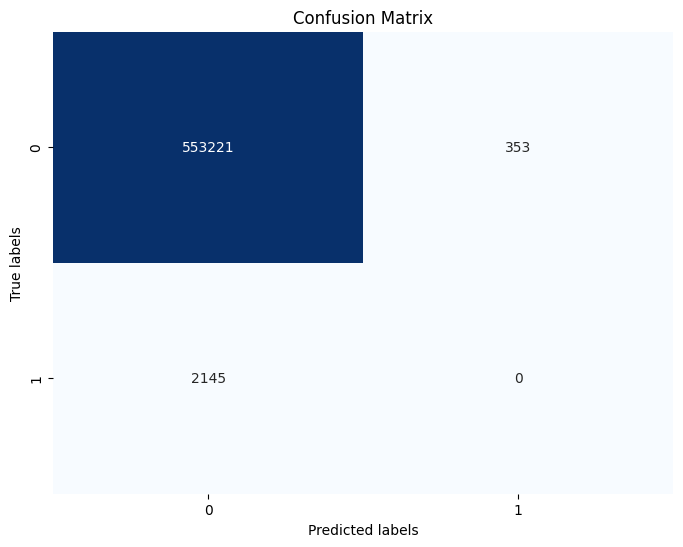

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(Y_test,y_pred))

Accuracy: 0.9955049224518147


In [22]:
y_prob = reg.predict_proba(X_test)[:, 1]
y_prob

array([0.0045877 , 0.00249566, 0.00482654, ..., 0.00206899, 0.00144392,
       0.00503308])

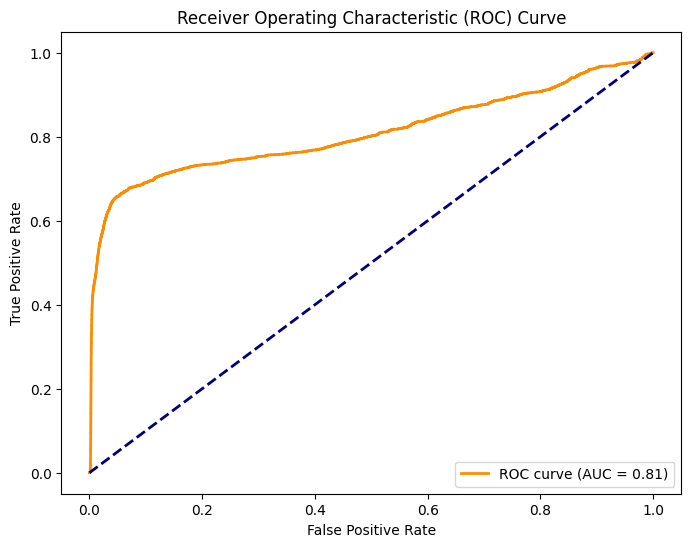

In [24]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()